In [1]:
import numpy as np
from scipy import interpolate

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = (15,8)
x=np.linspace(5.0,150.0,300)

# Executive Summary

The total flow prior to mixing is lower than the values extracted from the tube with mixed gas. Consequently, the amount of carbon dioxide appears to be lower than reported. The inconsistency between the two flow measurements, i.e., "before" and "after" the mixing, could be due to the definitive and known calibration of the rotameters for a single gas, while it is reported by the manufacturer that the calibration for a gas mixture is subjected to variations.

# Calibration

## Setup for atmosphere Argon and Stainless Steel ball

https://www.mathesongas.com/pdfs/flowchart/602%20(E300)/ARGON%20602(E300)%20SS%200%20PSIG.pdf

$\phi_{\text{Ar}}(z)$

In [3]:
ro,cal=np.loadtxt('ARGON_602(E300)_SS_0_PSIG.dat',unpack=True) # sccm
arflow=interpolate.interp1d(ro, cal)

## Setup for atmosphere Carbon Dioxide and Stainless Steel ball

https://www.mathesongas.com/pdfs/flowchart/602%20(E300)/CARBON%20DIOXIDE%20602(E300)%20SS%200%20PSIG.pdf

$\phi_{\text{CO}_2}(z)$

In [4]:
ro,cal=np.loadtxt('CARBON_DIOXIDE_602(E300)_SS_0_PSIG.dat',unpack=True) # sccm
co2flow=interpolate.interp1d(ro, cal)

## Plots

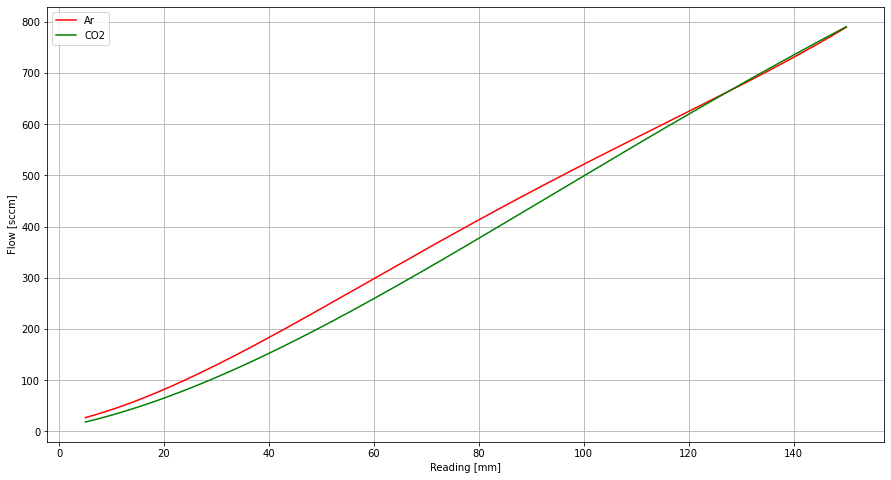

In [5]:
plt.plot(x, arflow(x), 'r', label='Ar')
plt.plot(x, co2flow(x),'g', label='CO2')
plt.xlabel('Reading [mm]')
plt.ylabel('Flow [sccm]')
plt.grid()
plt.legend(loc='upper left')
plt.show()

# Flow of a the gas mixture

Mixture fraction $f_{\text{Ar}}=1-f_{\text{CO}_2}$

In [24]:
f_co2=0.3

## Determination of the return fraction

Take the reading from the middle of the ball $z_{\text{in}}$ 

https://photos.app.goo.gl/wgFVmY5JfMx3TixcA

and $z_{\text{out}}$

https://photos.app.goo.gl/bVF7iXANj8YrsXhC7

In [25]:
zin=101
zout=66

Determine input Ar flow as $f_{\text{Ar}}\phi_{\text{Ar}}(z_{\text{in}})$

In [26]:
inar=arflow(zin)*(1.0-f_co2)
print(f'Ar inflow {inar:.1f} sccm')

Ar inflow 369.0 sccm


Determine input CO$_2$ flow as $f_{\text{CO}_2}\phi_{\text{CO}_2}(z_{\text{in}})$

In [27]:
inco2=co2flow(zin)*f_co2
print(f'CO2 inflow {inco2:.1f} sccm')

CO2 inflow 151.6 sccm


Determine input flow as $\phi_{\text{in}}=f_{\text{CO}_2}\phi_{\text{CO}_2}(z_{\text{in}}) + f_{\text{Ar}}\phi_{\text{Ar}}(z_{\text{in}})$

In [28]:
inFlow=inar+inco2
print(f'Gas Mixture inflow {inFlow:.1f} sccm')

Gas Mixture inflow 520.6 sccm


Determine output flow $\phi_{\text{out}}$ as above by replacing $z_{\text{in}}\rightarrow z_{\text{out}}$

In [29]:
outFlow=arflow(zout)*(1.0-f_co2)+co2flow(zout)*f_co2
print(f'Gas Mixture outflow {outFlow:.1f} sccm')

Gas Mixture outflow 321.6 sccm


Determine return fraction as $\frac{\phi_{\text{out}}}{\phi_{\text{in}}}$

In [30]:
print(f'Return fraction {outFlow/inFlow*100.0:.1f}%')

Return fraction 61.8%


## Determination of the flow prior to mixing

Carbon Dioxide flow $\phi_{\text{CO}_2}(z_1)$ for reading $z_1$

https://photos.app.goo.gl/5inXHJiXBmY5LRRJ6

In [13]:
z1=41 # reading
inCO2Flow=co2flow(z1)
print(f'CO2 inflow {inCO2Flow:.1f} sccm')

CO2 inflow 157.5 sccm


Argon flow $\phi_{\text{Ar}}(z_2)$ for reading $z_2$

https://photos.app.goo.gl/p2os5w12aqfPPWdU8

In [14]:
z2=89
inArFlow=arflow(z2)
print(f'Ar inflow {inArFlow:.1f} sccm')

Ar inflow 463.1 sccm


Total flow prior to mixing $\phi_{\text{sum}}=\phi_{\text{CO}_2}(z_1)+\phi_{\text{Ar}}(z_2)$

In [15]:
totFlow=inCO2Flow+inArFlow
print(f'Total input Flow {totFlow:.1f} sccm')

Total input Flow 620.7 sccm


Calculate CO$_2$ fraction $f_{\text{CO}_2}=\tfrac{\phi_{\text{CO}_2}(z_1)}{\phi_{\text{sum}}}$

In [16]:
co2frac=inCO2Flow/totFlow
print(f'CO2 fraction {co2frac*100:.1f}%')

CO2 fraction 25.4%


# Conclusion

The weighted average of the calibrated flow for the two components of the gas mixture, where the weights are given by the volume fraction of each component, seems to yield resonable values for the input flow. The calculated value of the return is in accordance with what was previously seen with Argon only.

However, if one tries to determine the input flow from the rotameters prior to mixing, the sum flow is about 20% higher. The largest difference between the two methods appears in the determination of the Ar flow. It follows that the fraction of carbon dioxide is lower than expected.